In [1]:
import os
import numpy as np
import xarray as xr
import importlib
import sys
import matplotlib.pyplot as plt
import math

sys.path.append( "/Users/etmu9498/research/code/scripts-winter2023/fl-data-compositing")
import auto_flight_level_plots_new_noaa_data as plot
import fl_mean_fields_binned
sys.path.append( "/Users/etmu9498/research/code/scripts-winter2023/fl-data-compositing")
import fl_mean_plots_error
import fl_mean_cloud_heights
sys.path.append( "/Users/etmu9498/research/code/scripts-winter2023/")
import helper_fns_winter2023

# helper functions for making nice plots, etc
sys.path.append( "/Users/etmu9498/research/code/scripts-winter2023/comps-ii-plot-helpers/sam-fl-comparisons")
import plot_time_series
import bin_rmw_data

Number of crl files to be added: 1
Cloud heights found
Cloud and P-3 Heights Added to Dataframe
Means and Confidence Intervals Found
Number of crl files to be added: 1


C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value 

Cloud heights found
Cloud and P-3 Heights Added to Dataframe
Means and Confidence Intervals Found


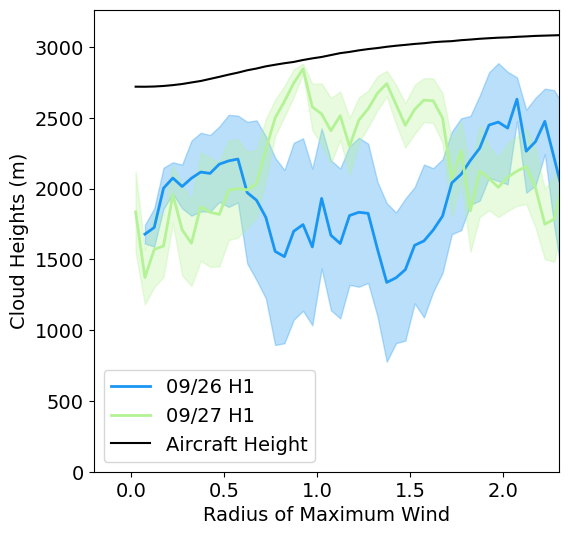

In [2]:
# bin crl cloud heights for each day and make radial plots!

# cases to use
case = '2' # '2' '3' 'all'

if case == '1':
    flight_list = ['P3_20210926H1_processed.nc']
    slice=[1]
elif case == '2':
    flight_list = ['P3_20210926H1_processed.nc', 'P3_20210927H1_processed.nc']
    slice=[1, 3]
elif case == '3':
    flight_list = ['P3_20210929H2_processed.nc']
    slice=[5]
elif case == 'all':
    flight_list = ['P3_20210926H1_processed.nc', 'P3_20210927H1_processed.nc', 'P3_20210929H2_processed.nc']
    slice=[1, 3, 5]

# plot setup
cmap = plt.cm.get_cmap( "rainbow") # "YlOrRd")
colors = []
for i in range( 6):
    colors.append( cmap(i/5))    
colors = list(np.array(colors)[slice])
plt.figure( figsize=(6,6))
lw = 2
helper_fns_winter2023.change_font_sizes(14, 14)

# add plots for every pass
for namei, name in enumerate( flight_list):
    # use the cloud height binning script
    mb=2.5
    bw=.05
    inputdict={}
    inputdict['2021'] = [name]
    df = fl_mean_cloud_heights.calc_cloud_heights_rmws(tc=inputdict, binwidth=.05, maxbin = mb)
    
    var = 'cloud_heights'
    label = name[7:9] + "/" + name[9:11] + " " + name[11:13]
    # add the relative vorticity plot!
    plt.plot( df[ 'midpoints'], df[ var + '_mean'], c=colors[ namei], linewidth=lw, label=label)
    ax = plt.gca()
    
    if case == 'all' or case == '2':
        # add a line representing the average P3 height for each bin!
        # use the 2nd line because it's slightly taller than the others- looks better tbh
        pass
        if namei == 1:
            plt.plot( df['midpoints'], df['p3_heights_mean'], c='k', label="Aircraft Height")
    else:
        plt.plot( df['midpoints'], df['p3_heights_mean'], c='k', label="Aircraft Height")
    
    ax.fill_between( df[ 'midpoints'], df[ var + '_lowc'], df[ var + '_highc'],
                       color=colors[ namei], alpha=0.3)
       
    ax.legend( loc='lower left') # , bbox_to_anchor=(1.01, 0), fancybox=False, shadow=False,)
    plt.xlabel("Radius of Maximum Wind")
    plt.xlim( [-.2, mb - .2])
    plt.ylabel( 'Cloud Heights (m)')   
    
    plt.yticks( np.arange(0, 3001, 500 ))

os.chdir("/Users/etmu9498/research-private/colloquium/")
plt.savefig('crl-' + case + '-heights.png', bbox_inches='tight', dpi=250)

In [3]:
df

,bins,midpoints,cloud_heights,p3_heights,cloud_heights_mean,cloud_heights_highc,cloud_heights_lowc,p3_heights_mean
0,0.00,0.025,"[272.04660571508, 1027.9564000726796, 1215.233...","[2720.0466057149915, 2719.9564000726186, 2721....",1835.899020,2120.684972,1551.113068,2721.041877
1,0.05,0.075,"[567.3411636301212, 758.2319633068792, 986.691...","[2721.3411636300434, 2720.231963306808, 2720.6...",1372.699807,1563.430196,1181.969417,2720.657254
2,0.10,0.125,"[737.1646938108449, 623.7378970478985, 300.650...","[2723.1646938107733, 2723.7378970478226, 2724....",1571.775806,1839.469757,1304.081855,2722.275806
3,0.15,0.175,"[954.2616737302801, 934.1728828429764, 924.464...","[2724.261673730216, 2728.172882842912, 2724.46...",1594.819269,1811.877215,1377.761323,2726.038781
4,0.20,0.225,"[2427.5470691186533, 2440.295520438059, 1462.8...","[2739.547069118642, 2734.2955204380487, 2734.8...",1958.224485,2159.967689,1756.481282,2732.074485
5,0.25,0.275,"[1457.1718834370886, 1664.16961894191, 1749.73...","[2753.1718834370417, 2750.169618941871, 2745.7...",1709.599202,2032.118935,1387.079470,2739.932536
6,0.30,0.325,"[1489.0085856064684, 1299.68067770188, 1309.67...","[2773.008585606422, 2769.680677701827, 2767.67...",1614.353961,1916.594558,1312.113365,2750.815500
7,0.35,0.375,"[2524.6656731745143, 2510.4958672504713, 2156....","[2794.6656731745047, 2792.4958672504613, 2786....",1873.435514,2256.295363,1490.575664,2761.277619
8,0.40,0.425,"[2019.5821177213638, 2465.956914331965, 2474.5...","[2817.582117721335, 2813.9569143319522, 2810.5...",1833.673884,2219.580336,1447.767432,2775.973884
9,0.45,0.475,"[2337.654261292714, 2300.193755649169, 2347.20...","[2835.654261292696, 2834.19375564915, 2833.206...",1818.480944,2186.525001,1450.436886,2790.638839


Number of data files to be plotted: 1
Number of data files to be plotted: 1
Number of data files to be plotted: 1
Number of data files to be plotted: 1


C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value encountered in

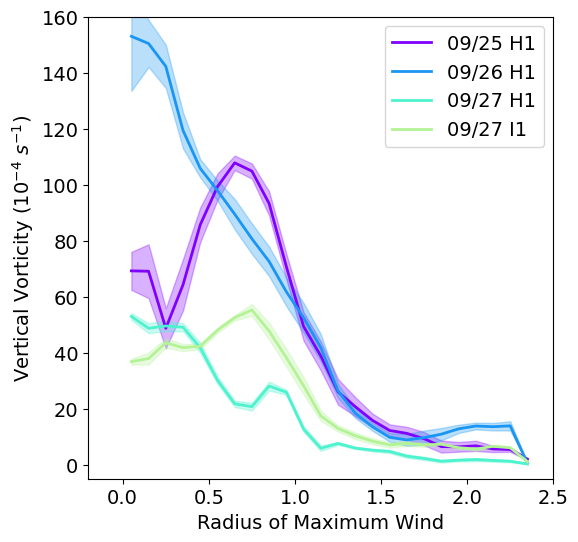

In [12]:
# make a single plot of relative vorticity! only show key flight days

# either make a 'smaller' plot for the last page, a 'total' plot for all passes, or a 'trimmed' plot for the original size
# but just the flight passes of interest.
plot_type = 'trimmed'

# list of relevant flights
if plot_type == 'total':
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', 
                   '20210927I1_sam_processed.nc', '20210929H1_sam_processed.nc', "20210929H2_sam_processed.nc"]
    plt.figure( figsize=(6,6))

elif plot_type == 'smaller':
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', 
               '20210927I1_sam_processed.nc']
    plt.figure( figsize=(6,3))
    
elif plot_type == 'trimmed':
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', '20210927I1_sam_processed.nc']
    plt.figure( figsize=(6,6))
    
cmap = plt.cm.get_cmap( "rainbow") # "YlOrRd")
colors = []
for i in range( 6):
    colors.append( cmap(i/5))

fs = 14
lw = 2
helper_fns_winter2023.change_font_sizes(14, 14)

mean_vorts = []
total_vorts = []

# add plots for every pass
for namei, name in enumerate( flight_list):
    fldict = {}
    fldict[ '2021'] = [name]
    
    bintype = 'rmw' # 'rmw'
    mb = 2.5
    bw = .1
    df = bin_rmw_data.bin( tc=fldict, binwidth=bw, maxbin = mb, new_data=False, bintype=bintype)
    df = bin_rmw_data.plot_setup( df)

    '''
    # take an average of the relative vorticity strength in the inner core! 0 to 1
    # print( df.rel_vort_mean[ np.where( df.bins <= 1.0)[0]])
    vort_mean = np.mean( df.rel_vort_mean[ np.where( df.bins <= 1.0)[0]])
    mean_vorts.append(vort_mean)
    
    # find the total vorticity from 0 to 1 rmw
    vort_tot = 0
    vort_0to1 = df.rel_vort_mean[ np.where( df.bins <= 1.0)[0]]
    for val in vort_0to1:
        vort_tot += val
    total_vorts.append(vort_tot)
    '''
    
    var = 'rel_vort'
    label = name[4:6] + "/" + name[6:8] + " " + name[8:10]
    
    # add the relative vorticity plot!
    plt.plot( df[ 'midpoints'], df[ var + '_mean'], c=colors[namei], linewidth=lw, label=label)
    ax = plt.gca()
    ax.fill_between( df[ 'midpoints'], df[ var + '_lowc'], df[ var + '_highc'],
                    color=colors[ namei], alpha=0.3)

    ax.legend( loc='upper right') # , bbox_to_anchor=(1.01, 0), fancybox=False, shadow=False,)
    
    plt.ylim([-5, 160])
    
    if bintype == 'rmw':
        plt.xlabel("Radius of Maximum Wind")
        plt.xlim( [-.2, mb])
    elif bintype == 'dist':
        plt.xlabel("Radial Distance (km)")
        plt.xlim( [-2, mb])
    
    plt.ylabel( 'Vertical Vorticity ($10^{-4}$' + ' ' + '$s^{-1}$)')    

for vorti in range(len(mean_vorts)):
    print('mean vorticity from 0 to 1 rmw: ' + str( np.round( mean_vorts[vorti], 3)))
    print('total vorticity from 0 to 1 rmw: ' + str( np.round( total_vorts[vorti], 3)))

    
os.chdir( "/Users/etmu9498/research-private/colloquium/")
plt.savefig( "rel-vort-" + plot_type + ".png", dpi=300 ) # bbox_inches='tight',

In [13]:
df

,bins,midpoints,HT.d,THETA.d,THETAV.d,WS.d,WD.d,UWZ.d,UWX.d,UWY.d,...,WD.d_lowc,rel_vort_mean,rel_vort_highc,rel_vort_lowc,UWX.d_mean,UWX.d_highc,UWX.d_lowc,HT.d_mean,HT.d_highc,HT.d_lowc
0,0.0,0.05,"[2598.009, 2597.3564, 2596.928, 2597.3242, 259...","[319.83383, 319.93698, 319.8253, 319.65262, 31...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.587551, 4.177372, 4.263935, 4.173047, 3.894...","[193.29353, 197.72455, 195.49081, 198.55476, 1...","[-0.25300527, -0.45474234, -0.5873816, 0.03717...","[1.054861, 1.2717645, 1.1388289, 1.3279089, 0....","[4.464627, 3.9790769, 4.1090403, 3.9561317, 3....",...,140.086659,30.257786,37.630208,22.885364,-0.544548,-0.235470,-0.853626,2601.408936,2601.917719,2600.900153
1,0.1,0.15,"[2603.67, 2603.2024, 2602.6233, 2602.463, 2602...","[321.21362, 321.1928, 321.1389, 321.11502, 321...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.656671, 9.466647, 9.531107, 9.295259, 9.733...","[236.40363, 238.46591, 238.12408, 236.78125, 2...","[0.5798519, 0.5767239, 0.50969684, 0.5594563, ...","[8.043585, 8.0687, 8.093758, 7.776275, 8.07164...","[5.3434105, 4.9511104, 5.0331993, 5.0922875, 5...",...,174.498189,33.184409,34.475574,31.893243,-0.003224,0.538471,-0.544920,2603.444092,2603.966255,2602.921928
2,0.2,0.25,"[2612.5518, 2611.4963, 2610.064, 2609.587, 261...","[320.42728, 320.56625, 320.62762, 320.4718, 32...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[16.348045, 16.167955, 15.9235, 15.669347, 15....","[234.87418, 233.97095, 234.09987, 234.41206, 2...","[0.31317282, 0.19795583, 0.4510261, 0.65919596...","[13.370909, 13.075329, 12.898677, 12.742678, 1...","[9.406241, 9.50992, 9.33713, 9.118805, 9.22069...",...,193.465180,41.520874,47.512569,35.529179,2.672233,3.501970,1.842495,2610.569824,2611.254792,2609.884857
3,0.3,0.35,"[2629.305, 2628.524, 2627.8838, 2626.9905, 262...","[319.69202, 319.46573, 319.5534, 319.60312, 31...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.802048, 24.923168, 24.506323, 24.413942, 2...","[241.6245, 242.47717, 241.93564, 240.71497, 24...","[0.5098618, 0.34352267, 0.02934022, -0.2248701...","[22.701979, 22.102533, 21.62486, 21.293772, 21...","[12.262373, 11.517044, 11.52932, 11.94219, 11....",...,192.296909,36.503048,40.094552,32.911544,2.852036,4.129803,1.574270,2618.166504,2618.939589,2617.393418
4,0.4,0.45,"[2652.939, 2651.1096, 2650.4019, 2649.4192, 26...","[319.393, 319.2847, 319.74167, 319.97745, 320....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[31.527859, 31.374882, 31.073778, 31.22412, 30...","[244.86726, 245.28357, 244.63902, 244.08838, 2...","[-1.6467037, -1.1652224, -1.6026369, -1.282510...","[28.543, 28.500578, 28.079111, 28.08513, 27.38...","[13.390411, 13.118701, 13.309515, 13.644452, 1...",...,193.881366,44.228958,45.905183,42.552734,3.785203,5.934549,1.635856,2634.529785,2635.512033,2633.547538
5,0.5,0.55,"[2685.4258, 2684.665, 2684.0613, 2683.1196, 26...","[319.56213, 319.4425, 319.27985, 319.1918, 319...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[41.211536, 40.4802, 40.72785, 40.92037, 41.25...","[248.32092, 248.57605, 248.158, 247.35223, 246...","[0.6533874, 0.101542704, 0.26388973, -0.004413...","[38.296543, 37.68315, 37.80414, 37.76498, 37.8...","[15.223843, 14.786033, 15.152728, 15.756991, 1...",...,192.536499,38.883108,40.299212,37.467005,3.188185,6.045685,0.330685,2654.622070,2656.003706,2653.240435
6,0.6,0.65,"[2715.6768, 2715.7273, 2713.1582, 2712.57, 271...","[320.19846, 320.0652, 319.68192, 319.23465, 31...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[45.576492, 45.38382, 45.75975, 46.57603, 47.1...","[245.79321, 246.28027, 246.75496, 247.41595, 2...","[0.38016456, 0.43792945, 0.33463582, -0.012412...","[41.569023, 41.549984, 42.04522, 43.004448, 43...","[18.687778, 18.25623, 18.059744, 17.88698, 17....",...,187.456194,34.690328,36.574158,32.806498,2.673296,6.324661,-0.978069,2678.734863,2680.918532,2676.551194
7,0.7,0.75,"[2745.5688, 2744.4102, 2743.2424, 2742.5913, 2...

Number of data files to be plotted: 1
Number of data files to be plotted: 1


C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value 

C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value 

Number of data files to be plotted: 1


C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value encountered in

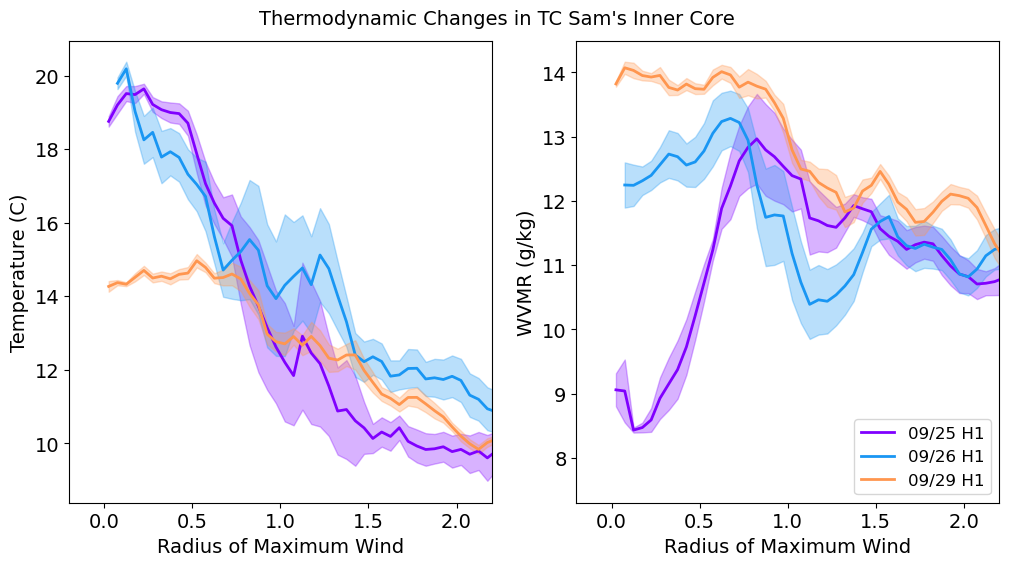

In [16]:
# make a single plot of temperature and water vapor! only show key flight days

# either make a 'total' plot for all passes, or a 'trimmed' plot for the original size
# but just the flight passes of interest.
plot_type = 'trimmed'

cmap = plt.cm.get_cmap( "rainbow") # "YlOrRd")
colors = []
for i in range( 6):
    colors.append( cmap(i/5))

# list of relevant flights
if plot_type == 'total':
    # list of relevant flights
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', 
                   '20210927I1_sam_processed.nc', '20210929H1_sam_processed.nc', "20210929H2_sam_processed.nc"]
    yheight = 17
elif plot_type == 'trimmed':
    # list of relevant flights
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210929H1_sam_processed.nc']
    yheight = 14.75
    slice = [0, 1, 4]
    colors=list(np.array(colors)[slice])    
    

subplot_list = [121, 122]
var_list = ['TA.d', 'MR.d']


plt.figure( figsize=(12, 6))
lw = 2
helper_fns_winter2023.change_font_sizes(14, 14)

# add plots for every pass
for namei, name in enumerate( flight_list):
    fldict = {}
    fldict[ '2021'] = [name]
    mb = 2.5
    bw = .05
    df = bin_rmw_data.bin( tc=fldict, binwidth=bw, maxbin = mb)
    df = bin_rmw_data.plot_setup( df)

    for vari, varval in enumerate(var_list):
        plt.subplot(subplot_list[vari])
        var = varval
        label = name[4:6] + "/" + name[6:8] + " " + name[8:10]

        # add the relative vorticity plot!
        plt.plot( df[ 'midpoints'], df[ var + '_mean'], c=colors[ namei], linewidth=lw, label=label)
        ax = plt.gca()
        ax.fill_between( df[ 'midpoints'], df[ var + '_lowc'], df[ var + '_highc'],
                        color=colors[ namei], alpha=0.3)

        plt.xlabel("Radius of Maximum Wind")
        plt.xlim( [-.2, mb - .3])

        if subplot_list[vari] == 121:
            plt.ylabel( 'Temperature (C)')    
        else:
            plt.ylabel( 'WVMR (g/kg)')
            plt.legend(loc='lower right', fontsize=12)
            
plt.text(-2, yheight, "Thermodynamic Changes in TC Sam's Inner Core")

os.chdir( "/Users/etmu9498/research-private/colloquium/")
plt.savefig( "t-wv-" + plot_type + ".png", dpi=300 ) # bbox_inches='tight',



In [ ]:
### loop through each of the 3 relevant crl days finding cloud top heights
crl_list = ["P3_20210926H1_processed.nc", "P3_20210927H1_processed.nc", "P3_20210929H2_processed.nc"]

os.chdir("/Users/etmu9498/research/data/crl-all-data-processed/2021/")
for namei, nameval in enumerate( crl_list):
    data = xr.open_dataset( nameval)
    
    print(np.nanmin(data.rmw.values))
    print(np.nanmax(data.rmw.values))
    print(list(data.keys()))

Number of data files to be plotted: 1
['UWZ.d', 'rel_vort', 'HT.d', 'LONref', 'PSURF.d', 'THETA.d', 'THETAV.d', 'TA.d', 'MR.d', 'WD.d', 'THETAE.d', 'UWX.d', 'WS.d', 'UWY.d', 'SfmrRainRate.1', 'HUM_REL.d', 'LATref']
Number of data files to be plotted: 1
['UWZ.d', 'rel_vort', 'HT.d', 'LONref', 'PSURF.d', 'THETA.d', 'THETAV.d', 'TA.d', 'MR.d', 'WD.d', 'THETAE.d', 'UWX.d', 'WS.d', 'UWY.d', 'SfmrRainRate.1', 'HUM_REL.d', 'LATref']
Number of data files to be plotted: 1
['UWZ.d', 'rel_vort', 'HT.d', 'LONref', 'PSURF.d', 'THETA.d', 'THETAV.d', 'TA.d', 'MR.d', 'WD.d', 'THETAE.d', 'UWX.d', 'WS.d', 'UWY.d', 'SfmrRainRate.1', 'HUM_REL.d', 'LATref']
Number of data files to be plotted: 1
['UWZ.d', 'rel_vort', 'HT.d', 'LONref', 'PSURF.d', 'THETA.d', 'THETAV.d', 'TA.d', 'MR.d', 'WD.d', 'THETAE.d', 'UWX.d', 'WS.d', 'UWY.d', 'SfmrRainRate.1', 'HUM_REL.d', 'LATref']
Number of data files to be plotted: 1


C:\Users\etmu9498\research\code\scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\research\code\scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value encountered in

['UWZ.d', 'rel_vort', 'HT.d', 'LONref', 'PSURF.d', 'THETA.d', 'THETAV.d', 'TA.d', 'MR.d', 'WD.d', 'THETAE.d', 'UWX.d', 'WS.d', 'UWY.d', 'SfmrRainRate.1', 'HUM_REL.d', 'LATref']
Number of data files to be plotted: 1
['UWZ.d', 'rel_vort', 'HT.d', 'LONref', 'PSURF.d', 'THETA.d', 'THETAV.d', 'TA.d', 'MR.d', 'WD.d', 'THETAE.d', 'UWX.d', 'WS.d', 'UWY.d', 'SfmrRainRate.1', 'HUM_REL.d', 'LATref']


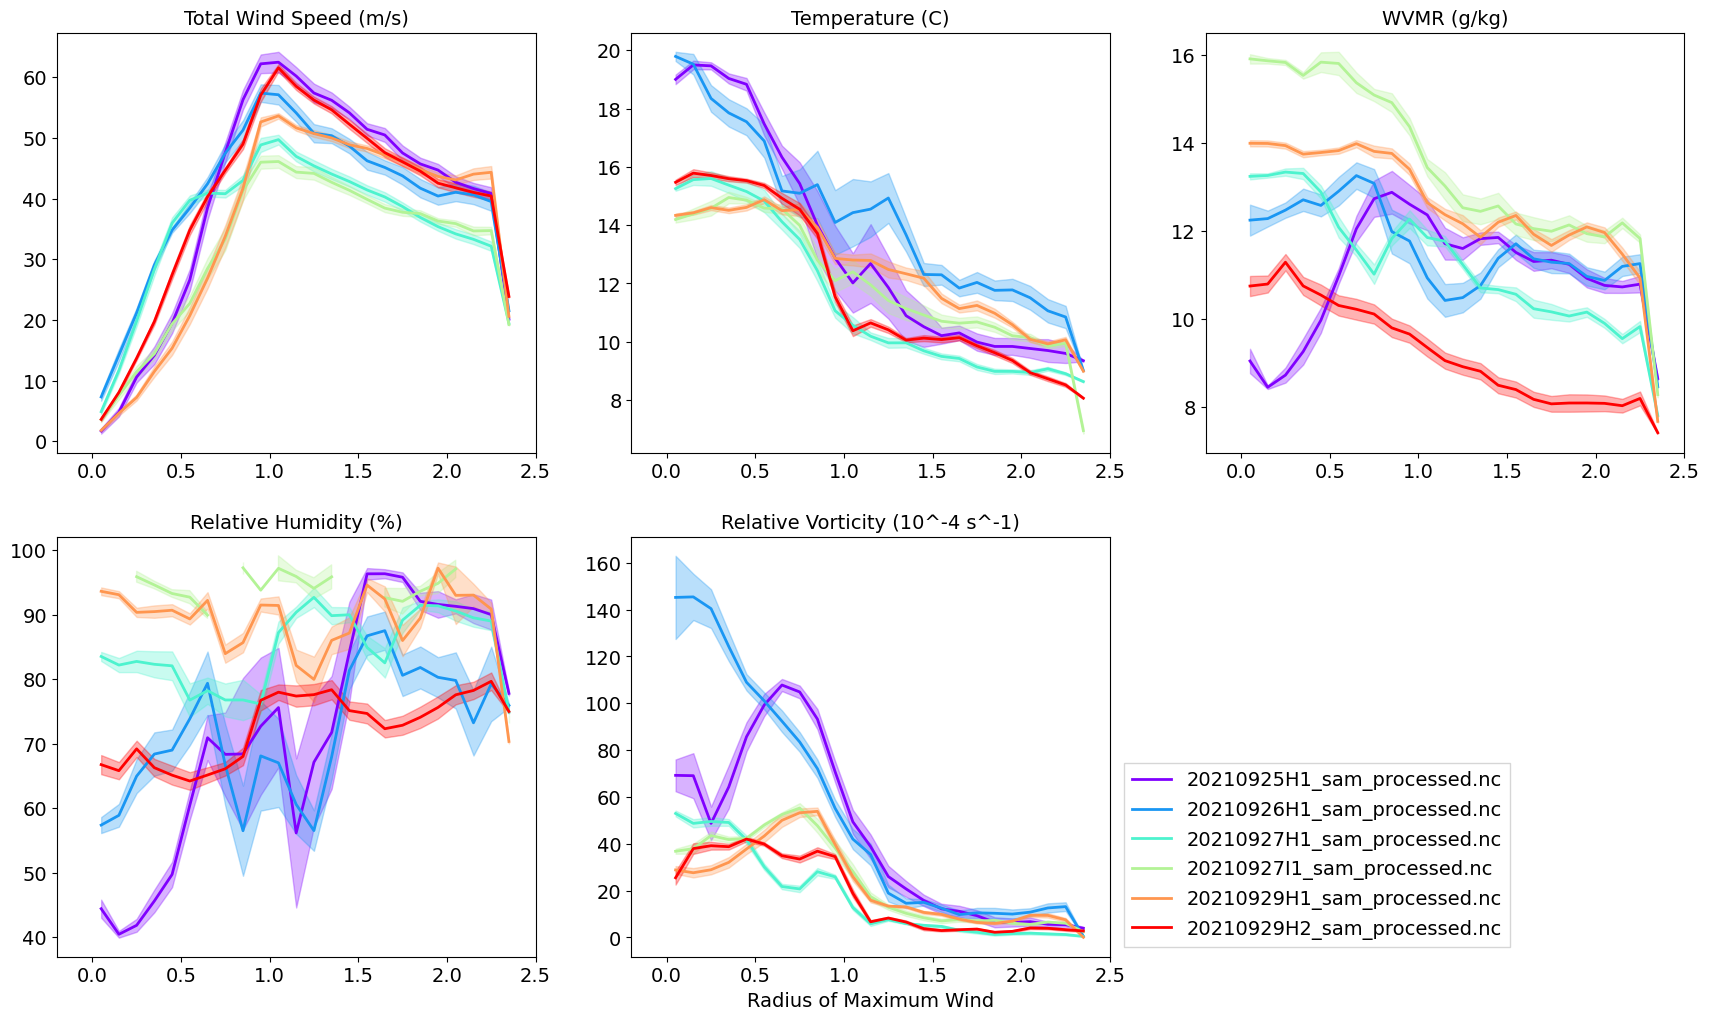

In [5]:
# make plots of mean values comparing each sam flight day! Use the code above for setup
flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', 
               '20210927I1_sam_processed.nc', '20210929H1_sam_processed.nc', "20210929H2_sam_processed.nc"]

#flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', 
#               "20210929H2_sam_processed.nc"]

# one color for each flight case
colors = [ 'y', 'r', 'k', 'b', 'c', 'g']

cmap = plt.cm.get_cmap( "rainbow") # "YlOrRd")
colors = []
for i in range( len( flight_list)):
    colors.append( cmap(i/5))


plt.figure( figsize=(21, 12))
lw = 2.
helper_fns_winter2023.change_font_sizes(14, 14)
subplots = [ 231, 232, 233, 234, 235] # , 236]

# old labels
# ylabels = [ "Total Wind Speed (m/s)", "Temperature (C)", "WVMR (g/kg)", "Vertical Velocity (m/s)", "Theta E (K)",
#           "SFMR Rain Rate (mm/hr)", "Relative Humidity (%)", 'Relative Vorticity (10^-4 s^-1)'] # 'Surface P (hPa)']
# var_names = ['WS.d', 'TA.d', 'MR.d', 'UWZ.d', 'THETAE.d', 'SfmrRainRate.1', 'HUM_REL.d', 'rel_vort'] # 'PSURF.d' ]

# new labels: fewer variables
ylabels = [ "Total Wind Speed (m/s)", "Temperature (C)", "WVMR (g/kg)", 
          "Relative Humidity (%)", 'Relative Vorticity (10^-4 s^-1)'] 
var_names = ['WS.d', 'TA.d', 'MR.d', 'HUM_REL.d', 'rel_vort'] 


# add plots for every pass
for namei, name in enumerate( flight_list):
    fldict = {}
    fldict[ '2021'] = [name]
    mb = 2.5
    df = bin_rmw_data.bin( tc=fldict, binwidth=.1, maxbin = mb)
    df = bin_rmw_data.plot_setup( df)

    # add subplots
    for i in range( len( subplots)):
        plt.subplot( subplots[ i])
        plt.plot( df[ 'midpoints'], df[ var_names[ i] + '_mean'], c=colors[ namei], linewidth=lw, label=name)
        ax = plt.gca()
        ax.fill_between( df[ 'midpoints'], df[ var_names[ i] + '_lowc'], df[ var_names[ i] + '_highc'],
                        color=colors[ namei], alpha=0.3)
        if subplots[ i] == 235:
            ax.legend( loc='lower left', bbox_to_anchor=(1.01, 0), fancybox=False, shadow=False,)
            plt.xlabel("Radius of Maximum Wind")

        # last case: add labels, limits, etc
        if namei == len( flight_list) - 1:
            plt.xlim( [-.2, mb])
            plt.title( ylabels[ i])    
            


    # add subplots to the figure!

Number of data files to be plotted: 1
Number of data files to be plotted: 1
Number of data files to be plotted: 1
Number of data files to be plotted: 1


C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:23: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users/etmu9498/research/code/scripts-winter2023\helpful_stats.py:27: RuntimeWarning: invalid value encountered in

Number of data files to be plotted: 1
Number of data files to be plotted: 1


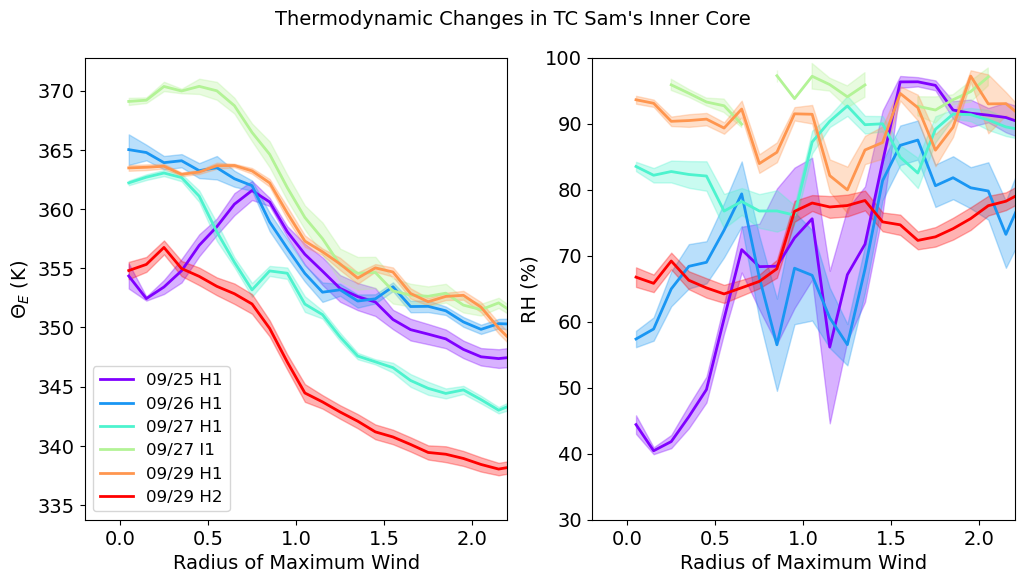

In [10]:
# make a supplemental figures for theta and relative humidity!

# either make a 'total' plot for all passes, or a 'trimmed' plot for the original size
# but just the flight passes of interest.
plot_type = 'total'

cmap = plt.cm.get_cmap( "rainbow") # "YlOrRd")
colors = []
for i in range( 6):
    colors.append( cmap(i/5))

# list of relevant flights
if plot_type == 'total':
    # list of relevant flights
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210927H1_sam_processed.nc', 
                   '20210927I1_sam_processed.nc', '20210929H1_sam_processed.nc', "20210929H2_sam_processed.nc"]
    yheight = 105
elif plot_type == 'trimmed':
    # list of relevant flights
    flight_list = [ "20210925H1_sam_processed.nc", '20210926H1_sam_processed.nc', '20210929H1_sam_processed.nc']
    yheight = 14.75
    slice = [0, 1, 4]
    colors=list(np.array(colors)[slice])    
    

subplot_list = [121, 122]
var_list = ['THETAE.d', 'HUM_REL.d']
ylim = [False, [30, 100]]


plt.figure( figsize=(12, 6))
lw = 2
helper_fns_winter2023.change_font_sizes(14, 14)

# add plots for every pass
for namei, name in enumerate( flight_list):
    fldict = {}
    fldict[ '2021'] = [name]
    mb = 2.5
    df = bin_rmw_data.bin( tc=fldict, binwidth=.1, maxbin = mb)
    df = bin_rmw_data.plot_setup( df)

    for vari, varval in enumerate(var_list):
        plt.subplot(subplot_list[vari])
        var = varval
        label = name[4:6] + "/" + name[6:8] + " " + name[8:10]

        # add the relative vorticity plot!
        plt.plot( df[ 'midpoints'], df[ var + '_mean'], c=colors[ namei], linewidth=lw, label=label)
        ax = plt.gca()
        ax.fill_between( df[ 'midpoints'], df[ var + '_lowc'], df[ var + '_highc'],
                        color=colors[ namei], alpha=0.3)

        plt.xlabel("Radius of Maximum Wind")
        plt.xlim( [-.2, mb - .3])
        
        if ylim[vari]:
            plt.ylim( [ylim[vari][0], ylim[vari][1]])

        if subplot_list[vari] == 121:
            plt.ylabel( '$\Theta_E$ (K)')    
            plt.legend(loc='lower left', fontsize=12)
        else:
            plt.ylabel( 'RH (%)')
            
plt.text(-2, yheight, "Thermodynamic Changes in TC Sam's Inner Core")

os.chdir( "/Users/etmu9498/research-private/colloquium/")
plt.savefig( "thetav-rh-" + plot_type + ".png", dpi=300 ) # bbox_inches='tight',

